<a target="_blank" href="https://colab.research.google.com/github/Richmaninoff/introgeodf/blob/main/Tarea2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [3]:
#pip install geopandas

In [4]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

In [6]:
#Las dimensiones 
countries.shape

(252, 2)

Part I

Complete all the exercises in Python, but prepare the visual in R.
Publish the Python code (as html or colab), and publish the visuals in R.

PART I

- Ejercicio 1: 
Commit and push the recently created geopackage.

Get the link from Github to read the geopackage into R.

Using the sf library in R, confirm the layers created (use st_layers), and open each map (read_sf). Draw the three layers (as we did in Python) using ggplot.

- Ejercicio 2:

Follow the same steps in this last section, but use Peru.
Plot your three layers in R.
- Ejercicio 3:

Reproject your maps of Peru.
Find the airports for Peru: The data is in a CSV file.
Create projected layer of airports.
Plot all the layers in R.
- Ejercicio 4:

Add the column "continent" to the 'theMapAndData' using the file from this link from kagle.
Keep the American continent.
Compute the centroids of the countries in America
Use the centroids to represent the fragility (Total_ei5) of 2020 in a map using R.


### Ejercicio 1: 

Despues de haber creado el archivo GPKG y subirlo a Github se ha obtenido el enlace del archivo que nos ayudará a visualizar en mapa en R

https://github.com/Richmaninoff/introgeodf/blob/main/maps/worldMap.gpkg

A continuación vamos  R para generar los gráficos 

In [7]:
#RPUB: 

### Ejercicio 2:

- Follow the same steps in this last section, but use Peru.
- Plot your three layers in R.

In [8]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))
#countries es el DF, de hecho es el archivo que posees

In [9]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [10]:
peru=countries[countries.COUNTRY=='Peru']

But you can also subset by clipping, as sometimes other data frames may not have the same fields for filtering:



In [11]:
citiesperu_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversperu_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

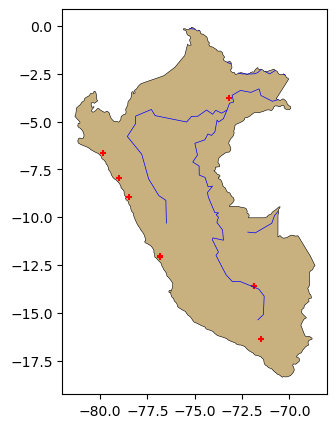

In [12]:
#plot the clipped version:

base = peru.plot(facecolor="#C8B17F", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesperu_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversperu_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [13]:
peru.geom_type


172    Polygon
dtype: object

In [14]:
citiesperu_clipped.geom_type


269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [15]:
riversperu_clipped.geom_type


59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

### Ejercicio 3:

Reproject your maps of Peru.
Find the airports for Peru:https://ourairports.com/data/ The data is in a CSV file.
Create projected layer of airports.
Plot all the layers in R.

In [16]:
# recommended for peru (meters)
peru.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [17]:
peru.to_crs(4326).centroid


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\612466451.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\181689520.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

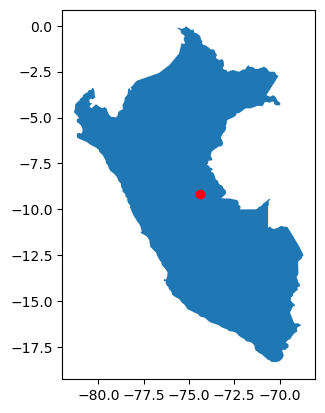

In [19]:
# replotting:

base4326=peru.to_crs(4326).plot()
peru.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [20]:
peru_4326=peru.to_crs(4326)

cities_peru_4326=citiesperu_clipped.to_crs(peru_4326.crs)

rivers_peru_4326=riversperu_clipped.to_crs(peru_4326.crs)

In [22]:
# saving 
import os

peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='country', driver="GPKG")
cities_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='cities', driver="GPKG")
rivers_peru_4326.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='rivers', driver="GPKG")

In [23]:
peru_4326.centroid


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\3754036082.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [24]:
peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_6860\3614473474.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  peru_4326.centroid.to_file(os.path.join("maps","peruMaps_4326.gpkg"), layer='centroid', driver="GPKG")


In [75]:
#ahora importamos la data de aeropuertos 

import pandas as pd
infoairports=pd.read_csv(os.path.join("data","pe_airports.csv"))

In [76]:
infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.021900,-77.114305,113.0,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
200,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.351500,-74.581900,505.0,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
201,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.928590,-73.987700,1496.0,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
202,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.147930,-74.306290,1056.0,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
203,351492,PE-0018,heliport,Tanquin Heliport,-12.126320,-74.075990,1880.0,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [77]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
1,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
2,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
3,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854000,-74.961502,1860.0,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00
4,6232,SPQT,medium_airport,Coronel FAP Francisco Secada Vignetta Internat...,-3.784740,-73.308800,306.0,SA,Peru,PE,...,Iquitos,1,SPQT,IQT,NaN,NaN,https://en.wikipedia.org/wiki/Crnl._FAP_Franci...,NaN,750,2022-08-29T12:46:38+00:00


In [92]:
infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [93]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [94]:
infoairports.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [105]:
# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [106]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

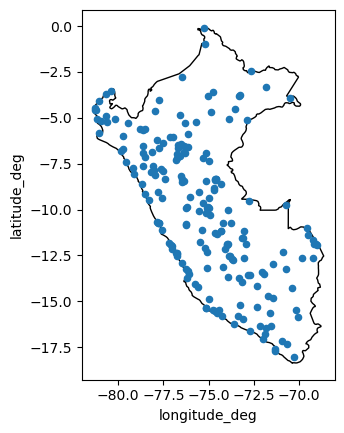

In [109]:
base = peru_4326.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [110]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=peru.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

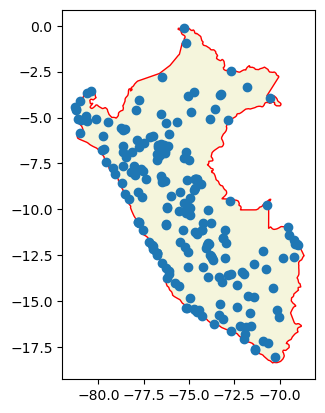

In [114]:

base = peru_4326.plot(color='beige', edgecolor='red')
airports.plot(ax=base)

In [115]:
type(airports), type(infoairports)


(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

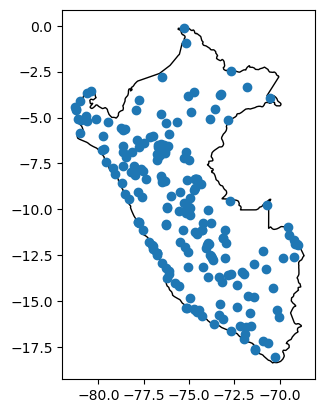

In [116]:
airports_4326=airports.to_crs(4326)

## then

base = peru_4326.plot(color='white', edgecolor='black')
airports_4326.plot(ax=base)

In [117]:
airports_4326['type'].value_counts()

type
small_airport     142
medium_airport     29
closed             25
heliport            6
large_airport       1
Name: count, dtype: int64

In [119]:
airports_4326.rename(columns={'type':'kind'},inplace=True)

In [120]:
airports_4326.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

### Ejercicio 4:

Add the column "continent" to the 'theMapAndData' using the file from this link from kagle: https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?resource=download
Keep the American continent.
Compute the centroids of the countries in America
Use the centroids to represent the fragility (Total_ei5) of 2020 in a map using R.

# Part II
Similar to Part I, do the CHALLENGE, using Python for coding, and R for plotting.
Challenge: 